In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("bank-additional.csv", delimiter=';')
df.rename(columns={'y': 'deposit'}, inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
print(df.describe())

               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.4000

In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [9]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

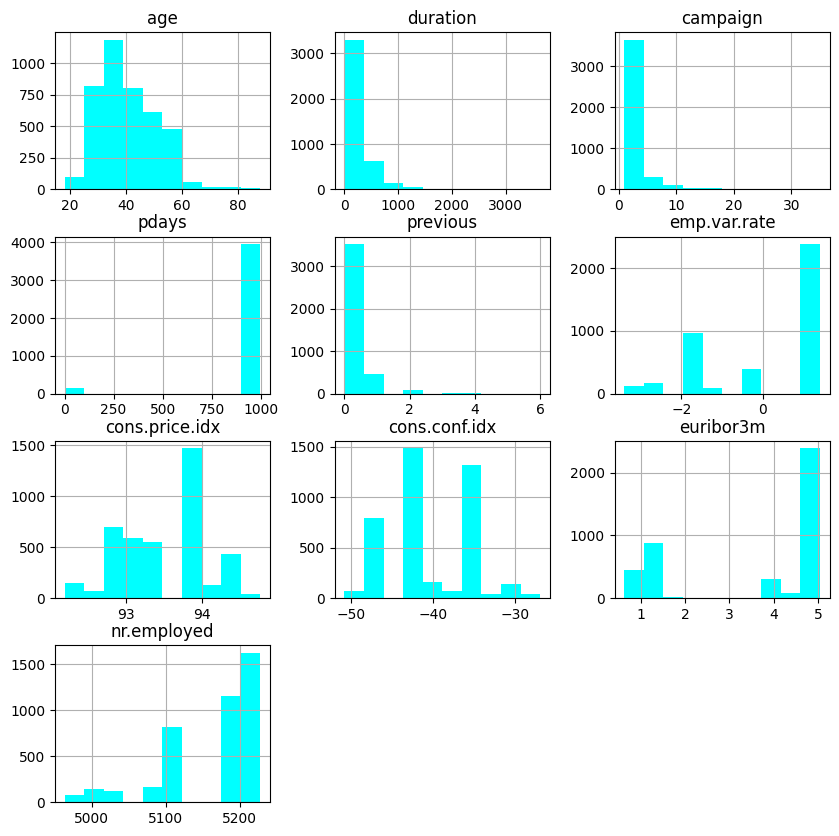

In [10]:
df.hist(figsize=(10,10),color='#00FFFF')
plt.show()

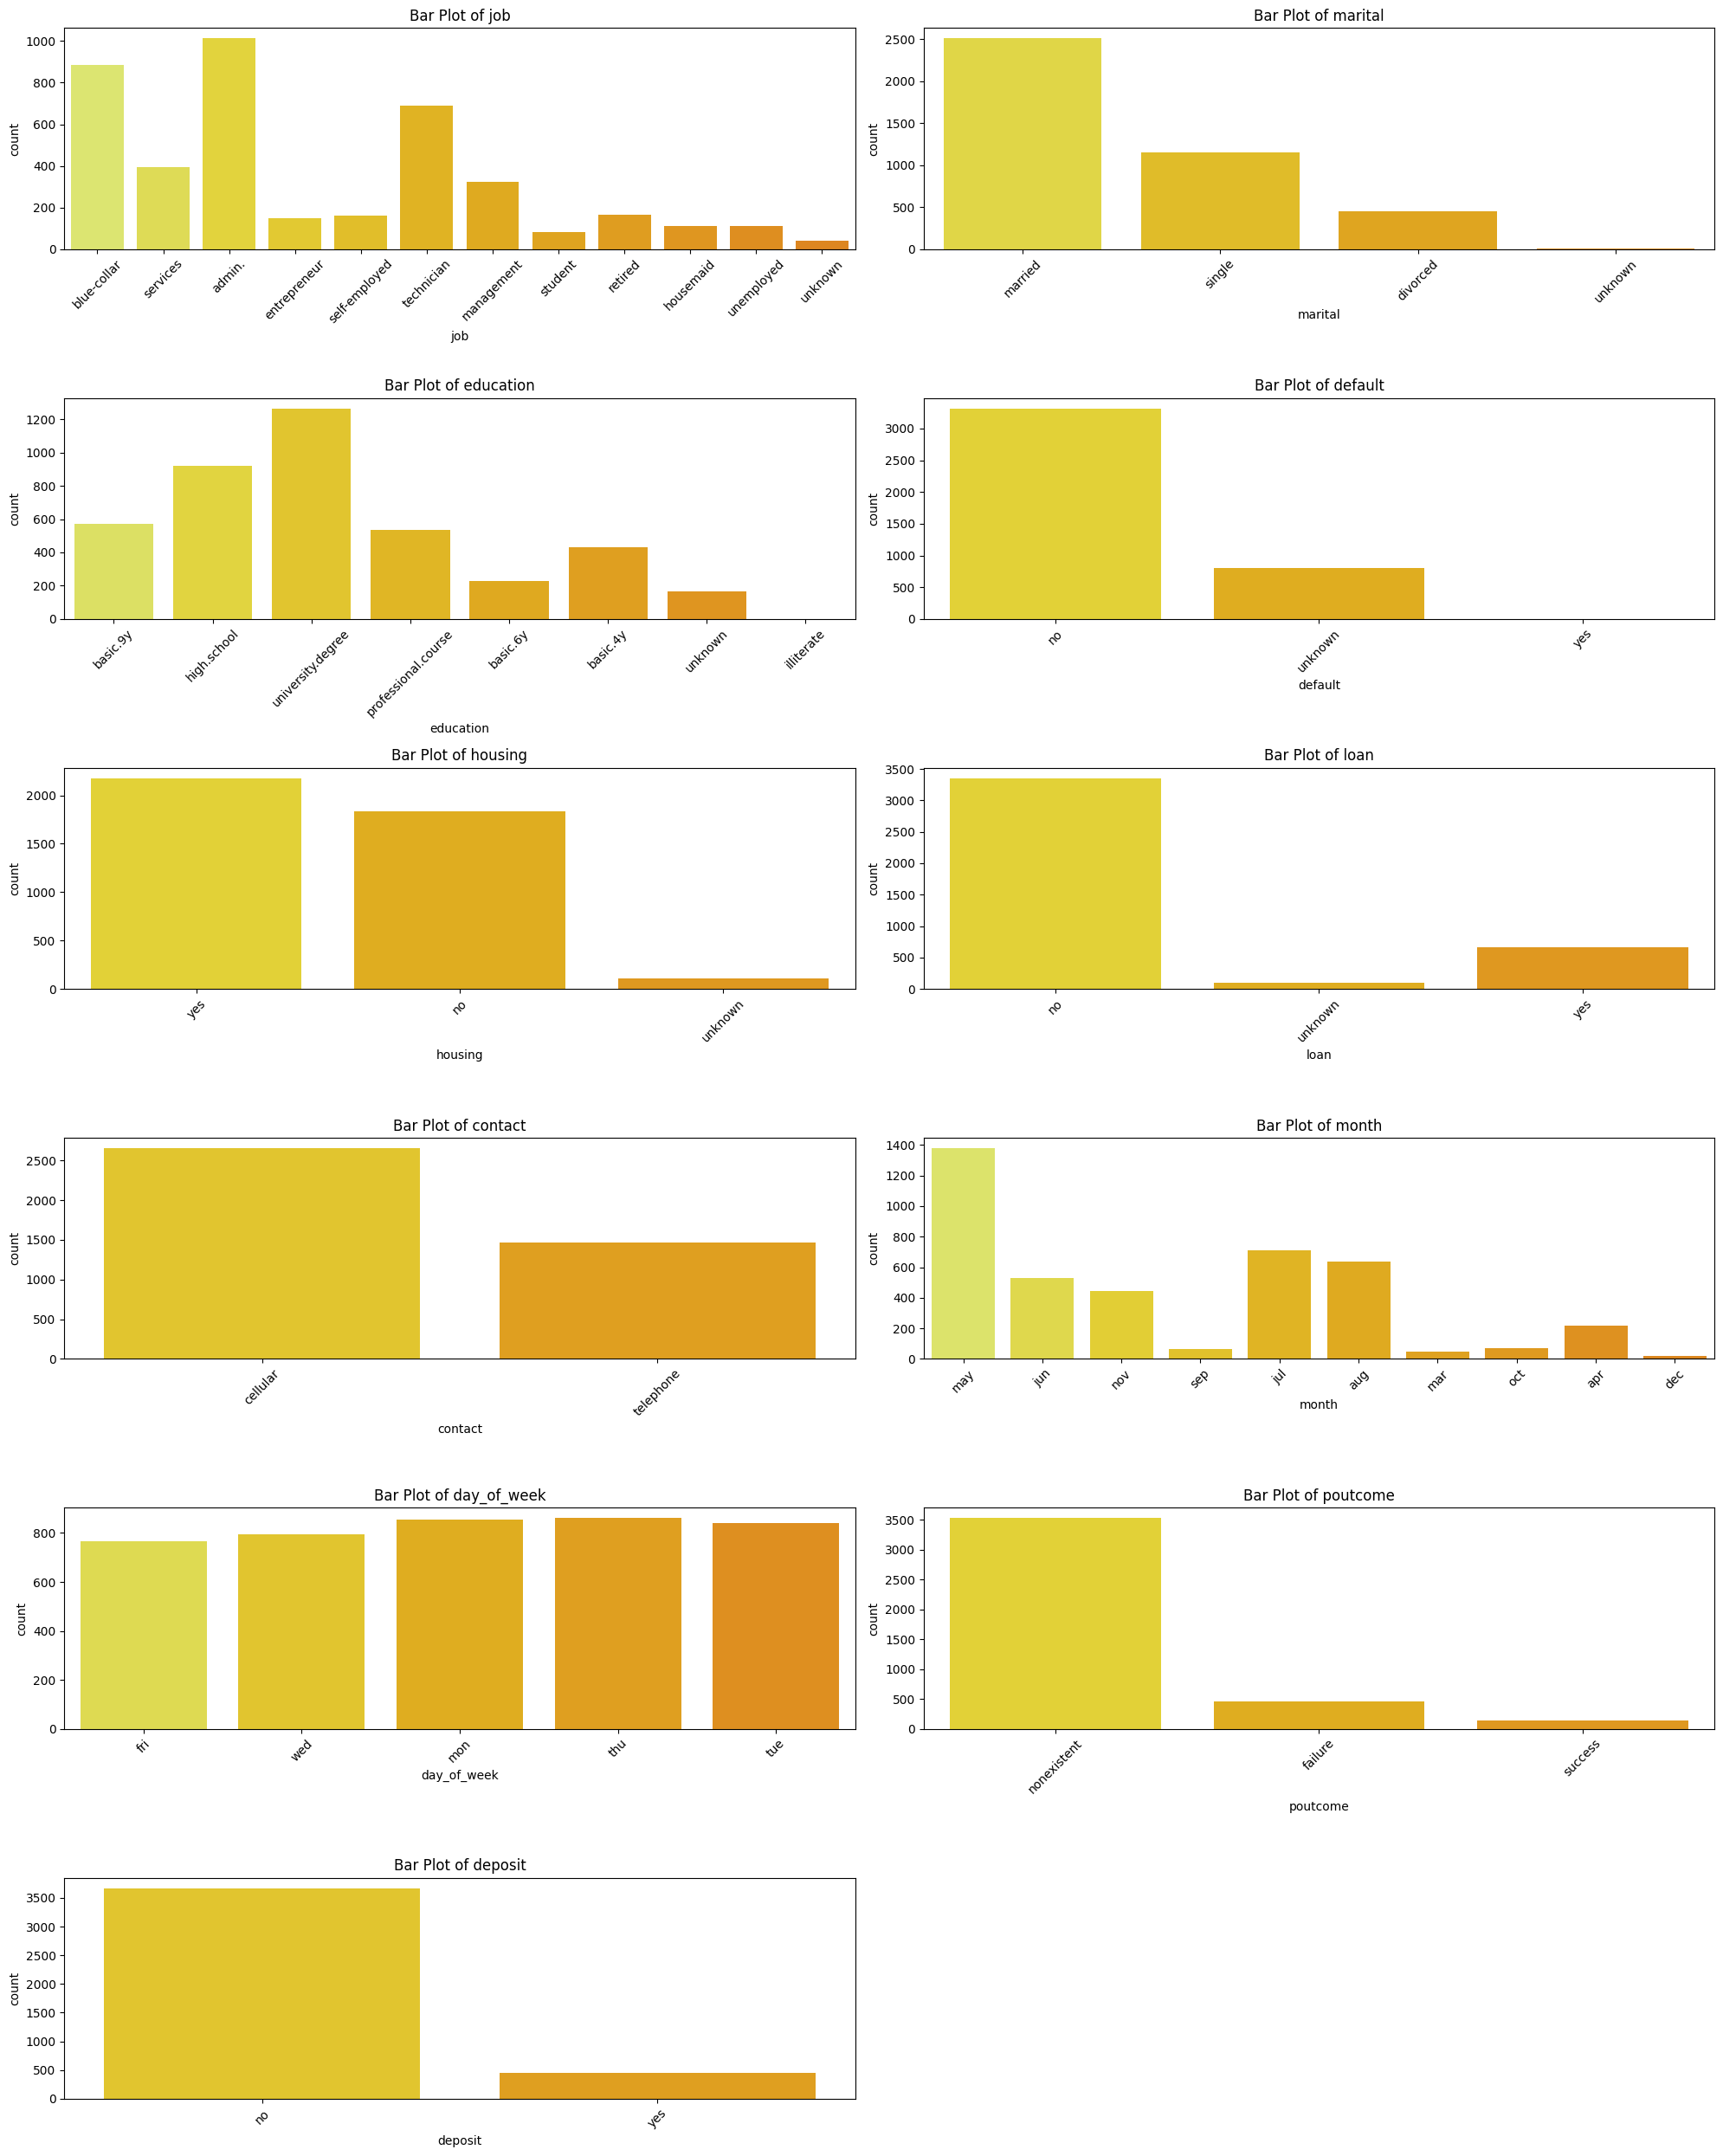

In [11]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols)+1)//2, 2, i)
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

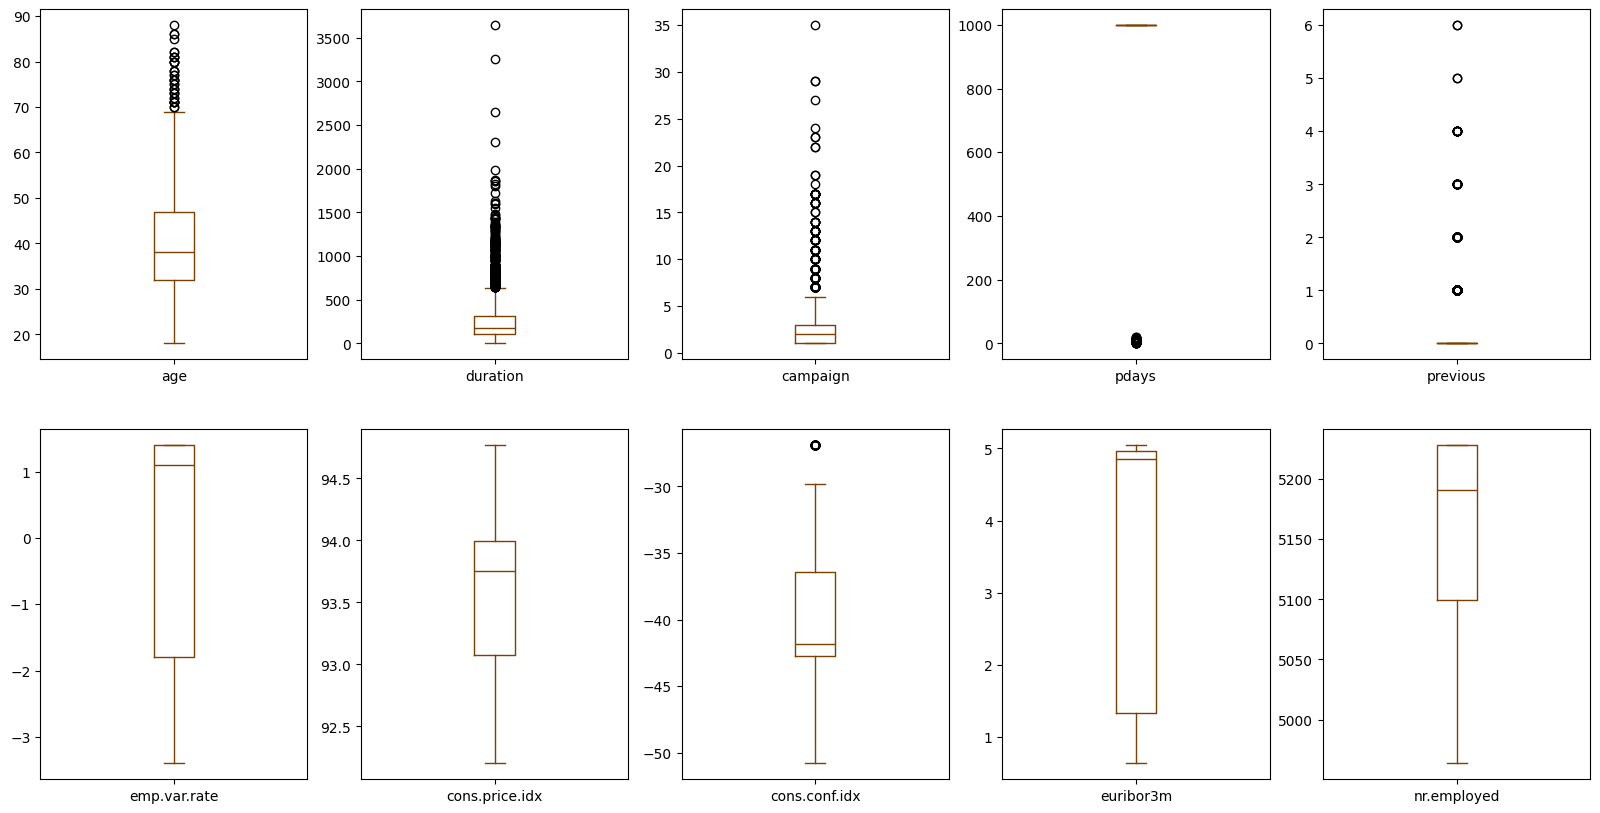

In [12]:
df.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#7b3f00')
plt.show()

In [13]:
cols_to_filter = ['age', 'campaign', 'duration']
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[cols_to_filter] = df[cols_to_filter].where(~((df[cols_to_filter] < lower_bound) | (df[cols_to_filter] > upper_bound)), np.nan)

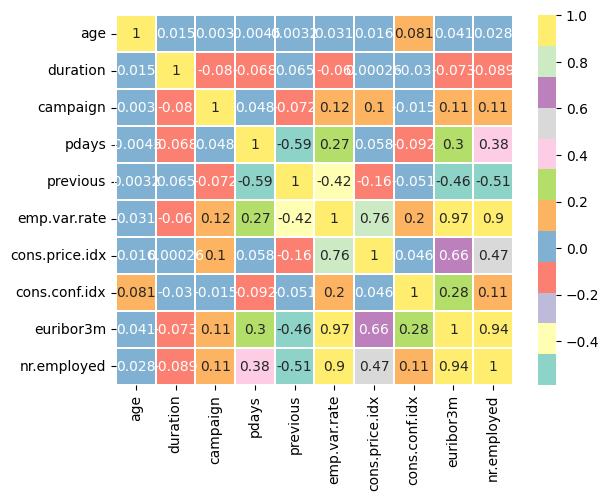

In [14]:
numeric_df = df.drop(columns=cat_cols)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='Set3', linewidths=0.2)
plt.show()

In [15]:
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']
df.drop(high_corr_cols, axis=1, inplace=True)

In [16]:
df_encoded = df.apply(LabelEncoder().fit_transform)

In [17]:
x = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [18]:
def eval_model(y_true, y_pred):
    print("Accuracy Score:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [19]:
def mscore(model):
    print("Training Score:", model.score(x_train, y_train))
    print("Testing Score:", model.score(x_test, y_test))

In [20]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt_gini.fit(x_train, y_train)
mscore(dt_gini)
eval_model(y_test, dt_gini.predict(x_test))

Training Score: 0.9177727419876983
Testing Score: 0.9087378640776699
Accuracy Score: 0.9087378640776699
Confusion Matrix:
 [[913  17]
 [ 77  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.57      0.23      0.33       100

    accuracy                           0.91      1030
   macro avg       0.75      0.61      0.64      1030
weighted avg       0.89      0.91      0.89      1030



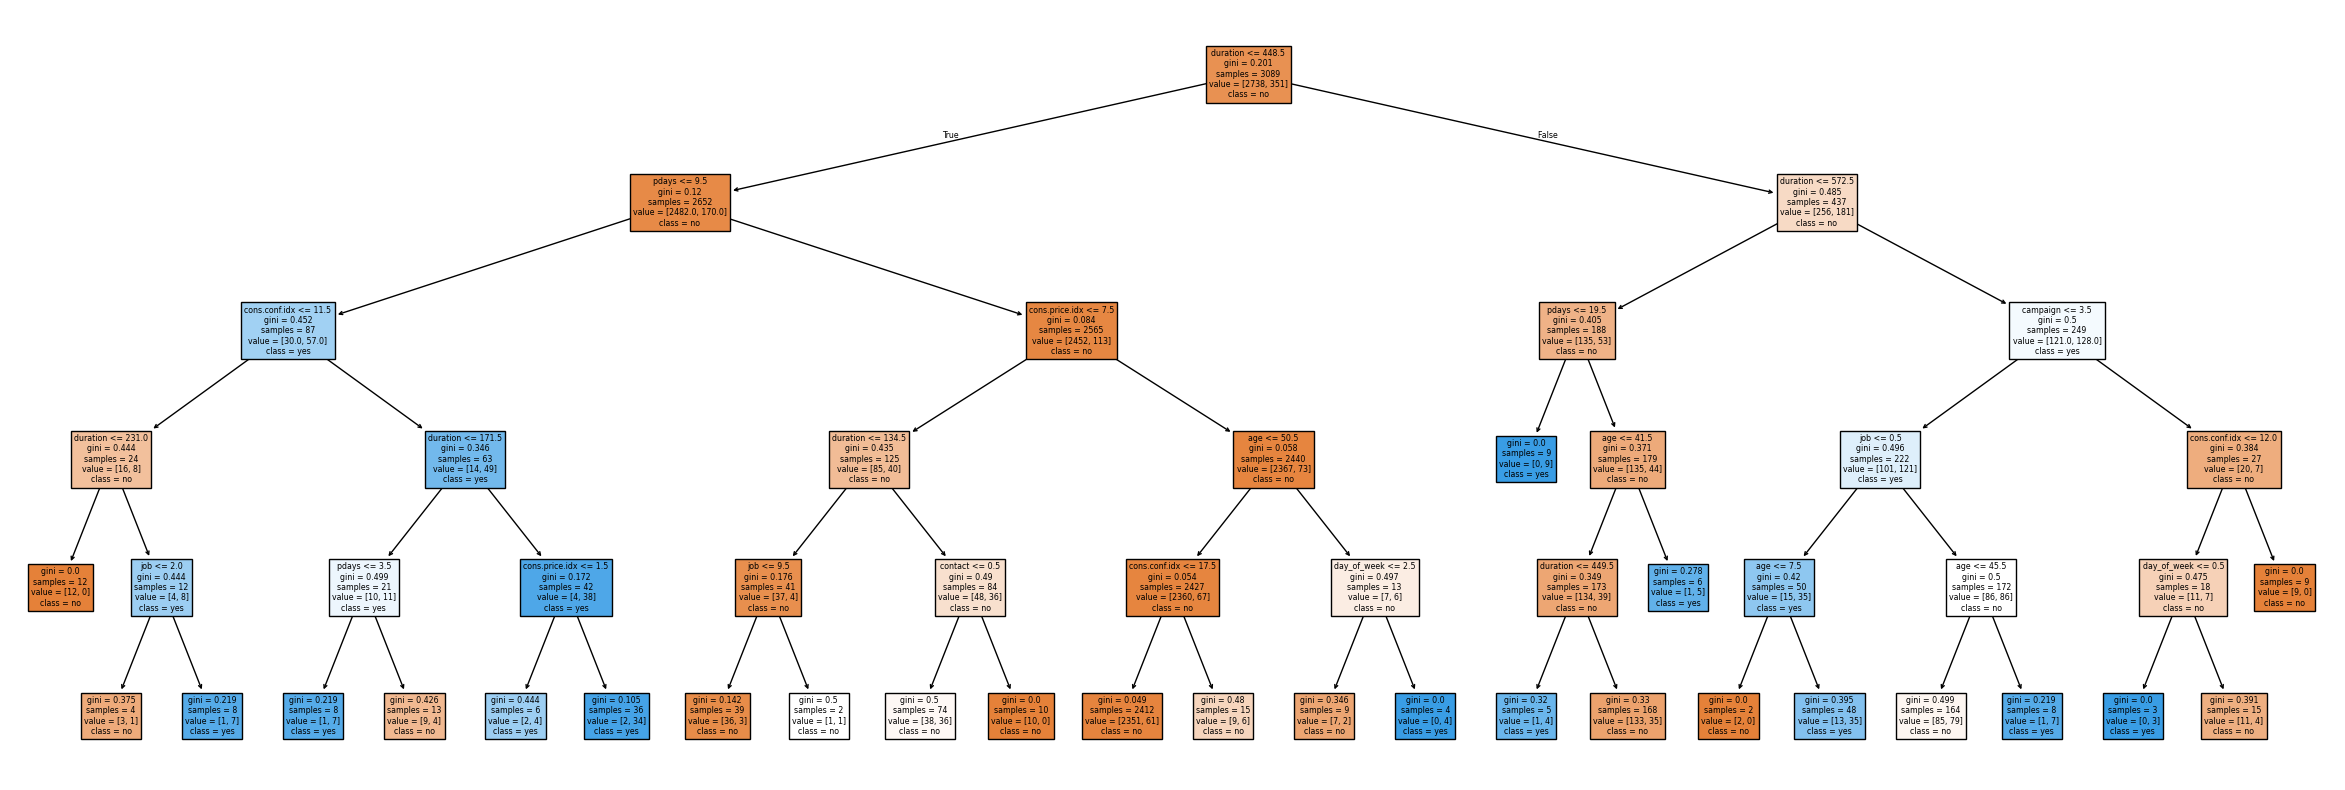

In [21]:
plt.figure(figsize=(30, 10))
plot_tree(dt_gini, class_names=['no', 'yes'], feature_names=x.columns, filled=True)
plt.show()

In [22]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt_entropy.fit(x_train, y_train)
mscore(dt_entropy)
eval_model(y_test, dt_entropy.predict(x_test))

Training Score: 0.9087083198446099
Testing Score: 0.9106796116504854
Accuracy Score: 0.9106796116504854
Confusion Matrix:
 [[911  19]
 [ 73  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.59      0.27      0.37       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



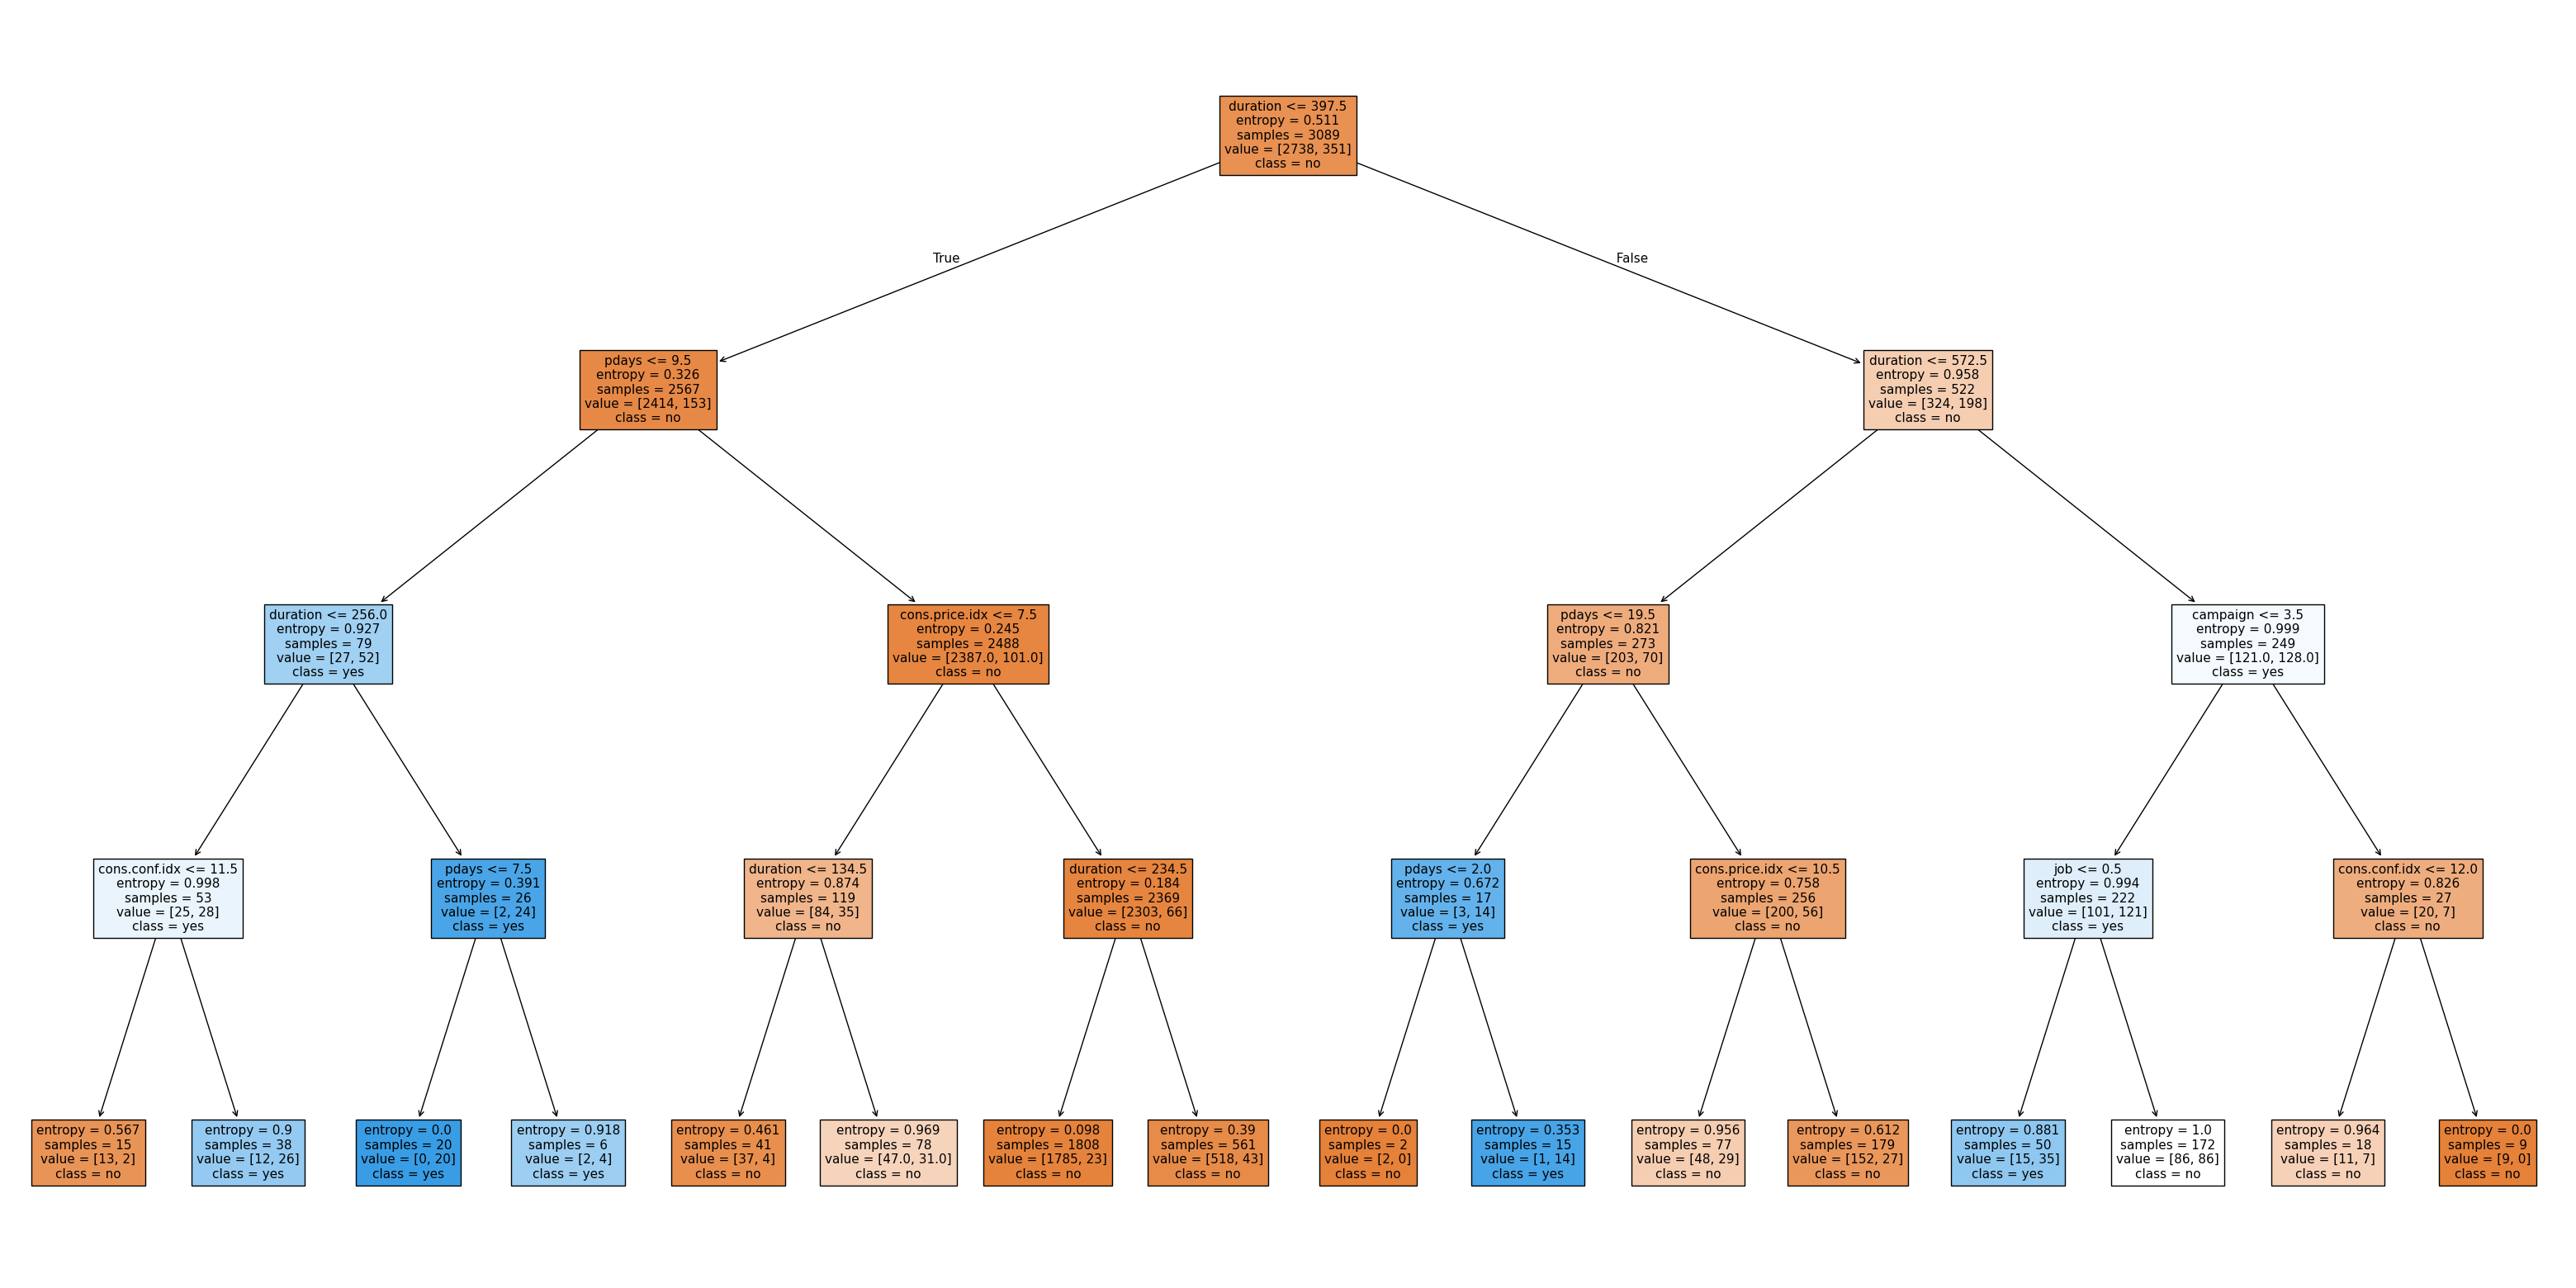

In [23]:
plt.figure(figsize=(40, 20))
plot_tree(dt_entropy, class_names=['no', 'yes'], feature_names=x.columns, filled=True)
plt.show()